# Environment Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

# Data Preprocessing

In [2]:
train_path = ".\\archive\\Train"
test_path = ".\\archive\\Test"

In [3]:
data = []
labels = []
classes = len(os.listdir(train_path))

In [32]:
for i in range(classes):
    path = os.path.join(train_path,str(i))
    images = os.listdir(path)
    for img in images:
        try:
            image = Image.open(path + '\\' + img)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)
    print("Precent complete: " + str(i*100/43))

Precent complete: 0.0
Precent complete: 2.3255813953488373
Precent complete: 4.651162790697675
Precent complete: 6.976744186046512
Precent complete: 9.30232558139535
Precent complete: 11.627906976744185
Precent complete: 13.953488372093023
Precent complete: 16.27906976744186
Precent complete: 18.6046511627907
Precent complete: 20.930232558139537
Precent complete: 23.25581395348837
Precent complete: 25.58139534883721
Precent complete: 27.906976744186046
Precent complete: 30.232558139534884
Precent complete: 32.55813953488372
Precent complete: 34.883720930232556
Precent complete: 37.2093023255814
Precent complete: 39.53488372093023
Precent complete: 41.86046511627907
Precent complete: 44.18604651162791
Precent complete: 46.51162790697674
Precent complete: 48.83720930232558
Precent complete: 51.16279069767442
Precent complete: 53.48837209302326
Precent complete: 55.81395348837209
Precent complete: 58.13953488372093
Precent complete: 60.46511627906977
Precent complete: 62.7906976744186
Pre

# Coverting Data to Numpy Array

In [37]:
data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


In [35]:
np.save("./archive/data", data)
np.save("./archive/target", labels)

# Load Data & Labels

In [4]:
data = np.load("./archive/data.npy")
labels = np.load("./archive/target.npy")

In [5]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# Creating X and y

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Onehot Encoding the Labels

In [43]:
from keras.utils import to_categorical

In [44]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building the Model

In [47]:
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [48]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [49]:
model.summaryary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 121s 118ms/step - loss: 2.0672 - accuracy: 0.4696 - val_loss: 0.6225 - val_accuracy: 0.8409
Epoch 2/20
981/981 [==============================] - 96s 98ms/step - loss: 0.7278 - accuracy: 0.7839 - val_loss: 0.2794 - val_accuracy: 0.9350
Epoch 3/20
981/981 [==============================] - 97s 98ms/step - loss: 0.4072 - accuracy: 0.8798 - val_loss: 0.1240 - val_accuracy: 0.9676
Epoch 4/20
981/981 [==============================] - 95s 96ms/step - loss: 0.3032 - accuracy: 0.9135 - val_loss: 0.1164 - val_accuracy: 0.9719
Epoch 5/20
981/981 [==============================] - 94s 95ms/step - loss: 0.2742 - accuracy: 0.9222 - val_loss: 0.0856 - val_accuracy: 0.9797
Epoch 6/20
981/981 [==============================] - 97s 99ms/step - loss: 0.2494 - accuracy: 0.9304 - val_loss: 0.0882 - val_accuracy: 0.9764
Epoch 7/20
981/981 [==============================] - 143s 146ms/step - loss: 0.2281 - accuracy: 0.9362 - val_loss: 0.1006 - val_accur

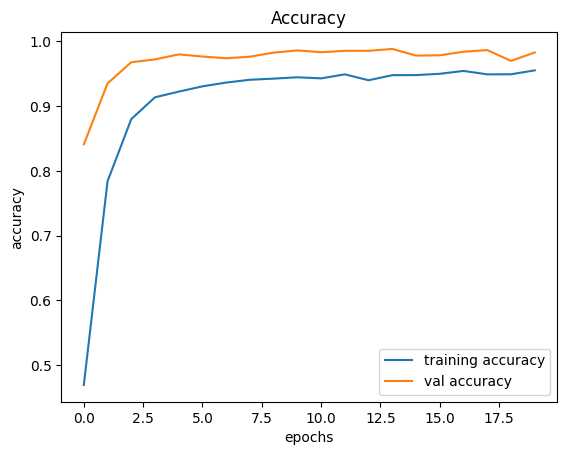

In [53]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

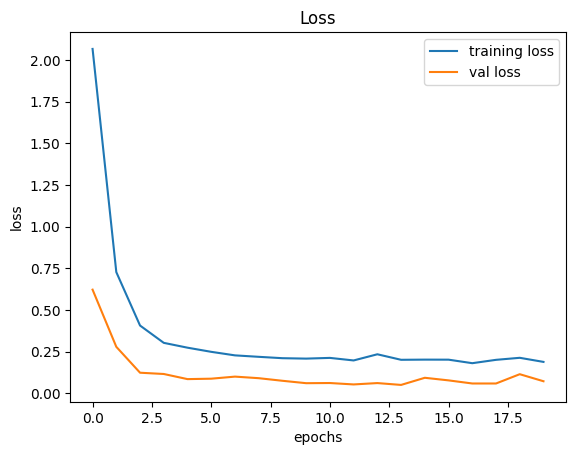

In [54]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing

In [56]:
df = pd.read_csv('./archive/Test.csv')
df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [57]:
def testing(csv_path):
    df = pd.read_csv(csv_path)
    y_test = df['ClassId'].values
    imgs = df['Path'].values
    data = []
    for img in imgs:
        image = Image.open('./archive/'+img)
        image = image.resize((30,30))
        image = np.array(image)
        data.append(image)
    X_test = np.array(data)
    return X_test, y_test

In [58]:
X_test, y_test = testing("./archive/Test.csv")

In [59]:
print(X_test.shape, y_test.shape)

(12630, 30, 30, 3) (12630,)


In [72]:
y_prob = model.predict(X_test)
y_prob

395/395 [==============================] - 8s 18ms/step


array([[0.00000000e+00, 4.60205258e-34, 5.22491734e-29, ...,
        2.34000757e-24, 4.66080824e-29, 3.82248269e-38],
       [1.70572349e-07, 9.99965787e-01, 8.74366968e-10, ...,
        1.88111732e-24, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.25301522e-05, 3.09166666e-02, 1.10506706e-01, ...,
        2.57552601e-04, 9.86676477e-03, 1.17278472e-02],
       [4.97312684e-16, 8.05529652e-08, 3.24865056e-07, ...,
        4.69107218e-12, 8.66870558e-18, 3.57724502e-15],
       [3.77061105e-10, 1.09404766e-07, 7.79192977e-09, ...,
        5.25755240e-07, 1.85591731e-09, 1.51449922e-06]], dtype=float32)

In [79]:
y_pred = []
for i in range(len(y_prob)):
    y_pred.append(np.argmax(y_prob[i]))

# Accuracy

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_test, y_pred)

0.9425178147268408

# Exporting the model

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [6]:
import pickle

In [84]:
with open("trained_model.pkl", 'wb') as file:
    pickle.dump(model, file)

# Loading the model

In [7]:
with open("trained_model.pkl", 'rb') as file:
    model = pickle.load(file)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [10]:
classes = {0:"Speed Limit 20 km/h",
          1:"Speed Limit 30 km/h",
          2:"Speed Limit 50 km/h",
          3:"Speed Limit 60 km/h",
          4:"Speed Limit 70 km/h",
          5:"Speed Limit 80 km/h",
          6:"End of Speed Limit 80 km/h",
          7:"Speed Limit 100 km/h",
          8:"Speed Limit 120 km/h",
          9:"No Passing",
          10:"No Passing Vehicle over 3.5 tons",
          11:"Right-of-way at Intersection",
          12:"Priority Road",
          13:"Yield",
          14:"Stop",
          15:"No Vehicles",
          16:"Vehicle > 3.5 tons Prohibited",
          17:"No Entry",
          18:"General Caution",
          19:"Dangerous Curve Left",
          20:"Dangerous Curve Right",
          21:"Double Curve",
          22:"Bumpy Road",
          23:"Slippery Road",
          24:"Road Narrows on the Right",
          25:"Road Work",
          26:"Traffic Signals",
          27:"Pedestrians Crossing",
          28:"Children Crossing",
          29:"Bicycles Crossing",
          30:"Beware of Ice/Snow",
          31:"Wild Animals Crossing",
          32:"End Speed + Passing Limits",
          33:"Turn Right Ahead",
          34:"Turn Left Ahead",
          35:"Ahead Only",
          36:"Go Straight or Right",
          37:"Go Straight or Left",
          38:"Keep Right",
          39:"Keep Left",
          40:"Roundabout Mandatory",
          41:"End of No Passing",
          42:"End of No Passing Vehicle over 3.5 tons"}

In [46]:
def get_prediction(image_path):
    d = []
    image = Image.open(image_path)
    resized_image = image.resize((30,30))
    d.append(np.array(resized_image))
    prob = model.predict(np.array(d))
    pred = np.argmax(prob)
    return image,pred

1/1 [==============================] - 0s 58ms/step
Predicted Traffic Sign is: Speed Limit 70 km/h


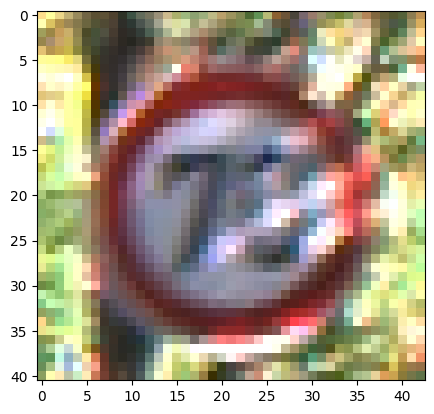

In [63]:
test_image = os.path.join(test_path,"00014.png")
plot, pred = get_prediction(test_image)
print(f"Predicted Traffic Sign is: {classes[pred]}")
plt.imshow(plot)